In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Ball:
    def __init__(self, center, radius):
        self.coordinates = center
        self.radius = radius

    def to_bound_balls(self, ball1, ball2):
        self.coordinates = [(ball1.coordinates[i] + ball2.coordinates[i]) / 2 for i in range(len(ball1.coordinates))]
        pom = max(ball1.radius, ball2.radius)
        self.radius = ((self.coordinates[0] - ball1.coordinates[0])**2 + (self.coordinates[1] - ball1.coordinates[1])**2)**0.5 + pom + 0.1
        

In [3]:
class BallTreeNode:
    def __init__(self, ball=None, parent=None, left=None, right=None):
        self.ball = ball       # Lopta koja je asocirana sa ovim čvorom.
        self.parent = parent    # Referenca na roditeljski čvor.
        self.left = left       # Referenca na levi čvor.
        self.right = right      # Referenca na desni čvor.

In [4]:
class BallTree:
    def __init__(self, balls, root=None):
        self.balls = balls  # Lista lopti
        self.root = self.build_ball_tree_range(0, len(balls) - 1)

    def most_spread_coord(self, l, u):
        max_spread = 0
        best_coord = 0
        for i in range(len(self.balls[0].coordinates)):
            min_val = min(self.balls[j].coordinates[i] for j in range(l, u + 1))
            max_val = max(self.balls[j].coordinates[i] for j in range(l, u + 1))
            spread = max_val - min_val
            if spread > max_spread:
                max_spread = spread
                best_coord = i
        return best_coord

    def select_on_coord(self, c, k, l, u):
        while l < u:
            r = random.randint(l, u)
            self.balls[l], self.balls[r] = self.balls[r], self.balls[l]  # Swap
            pivot = self.balls[l]
            m = l
            for i in range(l + 1, u + 1):
                if self.balls[i].coordinates[c] < pivot.coordinates[c]:
                    m += 1
                    self.balls[m], self.balls[i] = self.balls[i], self.balls[m]  # Swap
            self.balls[l], self.balls[m] = self.balls[m], self.balls[l]  # Završna izmena
            if m == k:
                return
            elif m < k:
                l = m + 1
            else:
                u = m - 1

    def build_ball_tree_range(self, l, u):
        if l == u:
            leaf = BallTreeNode(ball=self.balls[l])
            return leaf
        else:
            c = self.most_spread_coord(l, u)
            m = (l + u) // 2
            self.select_on_coord(c, m, l, u)
            
            node = BallTreeNode()
            node.left = self.build_ball_tree_range(l, m)
            node.left.parent = node
            
            node.right = self.build_ball_tree_range(m + 1, u)
            node.right.parent = node

            
            node.ball = Ball(center=[0] * len(self.balls[0].coordinates), radius=0)
            node.ball.to_bound_balls(node.left.ball, node.right.ball)
            #print("****************")
            #print(node.ball.radius)
            
            return node

In [5]:
balls = [
    Ball(center=[1, 2], radius=0.5), 
    Ball(center=[2.1, 4], radius=0.6),
    Ball([2,2], 1), 
    Ball(center=[6, 5], radius=0.5),  
    Ball(center=[4, 6], radius=0.2), 
    Ball([7,3], 0.5),
    Ball([6.3, 3], 1.2)
]


In [6]:
ball_tree = BallTree(balls)

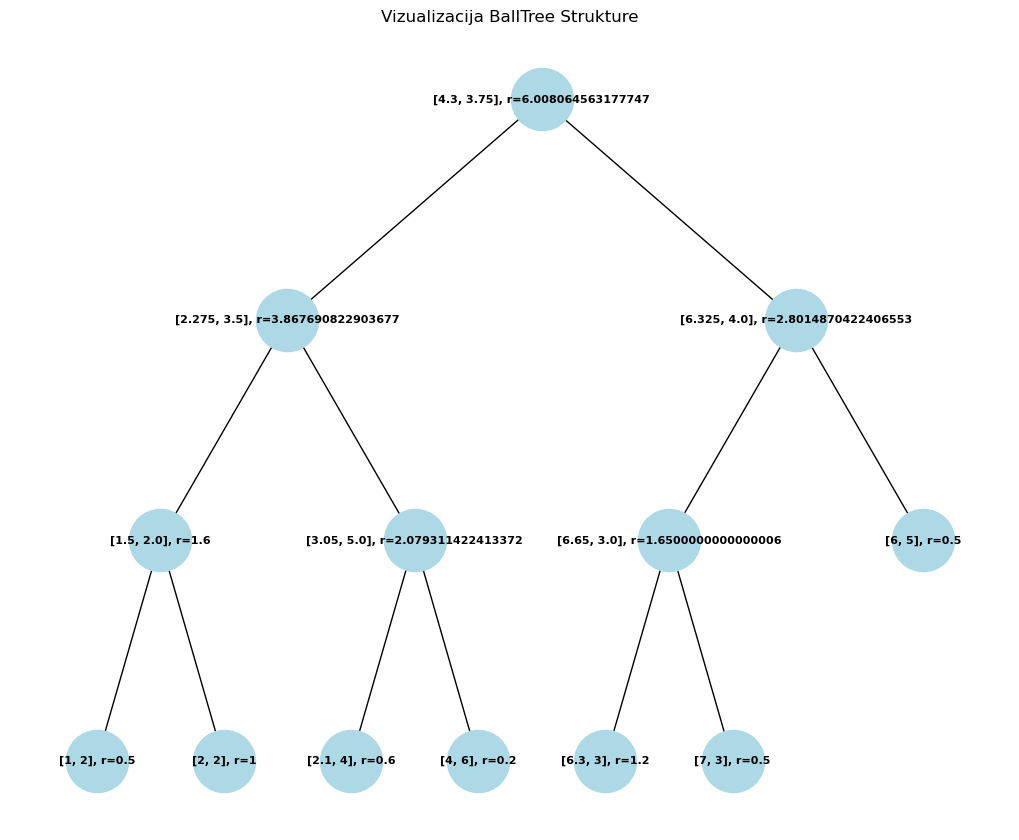

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_ball_tree(node, pos=None, level=0, x=0, dx=1.0, graph=None, labels=None):
    """ Pomoćna funkcija za rekursivno crtanje BallTree strukture. """
    if pos is None:
        pos = {}
    if graph is None:
        graph = nx.Graph()
    if labels is None:
        labels = {}

    pos[node] = (x, -level)
    labels[node] = f"{node.ball.coordinates}, r={node.ball.radius}"

    # Ako ima levog deteta, dodaj u graf i rekurzivno pozovi za levo dete
    if node.left is not None:
        graph.add_edge(node, node.left)
        plot_ball_tree(node.left, pos=pos, level=level + 1, x=x - dx, dx=dx / 2, graph=graph, labels=labels)
    # Ako ima desnog deteta, dodaj u graf i rekurzivno pozovi za desno dete
    if node.right is not None:
        graph.add_edge(node, node.right)
        plot_ball_tree(node.right, pos=pos, level=level + 1, x=x + dx, dx=dx / 2, graph=graph, labels=labels)

    return graph, pos, labels

# Kreiranje grafa, pozicije i labele iz BallTree strukture
graph, pos, labels = plot_ball_tree(ball_tree.root)

# Crtanje grafa
plt.figure(figsize=(10, 8))
nx.draw(graph, pos, labels=labels, with_labels=True, node_size=2000, node_color='lightblue', font_size=8, font_weight='bold')
plt.title('Vizualizacija BallTree Strukture')
plt.savefig('results/kd_graph1.png')
plt.show()


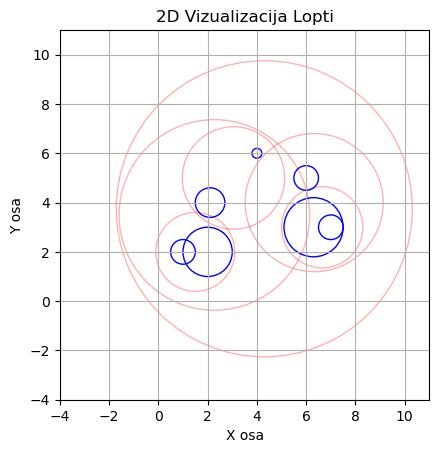

In [8]:
def plot_ball(ax, ball, color='b', alpha=1.0):
    """ Pomoćna funkcija za crtanje kruga. """
    circle = plt.Circle(ball.coordinates, ball.radius, color=color, fill=False, alpha=alpha)
    ax.add_artist(circle)

def plot_tree(node, ax, level=0, max_level=10):
    """ Rekurzivno prolazi kroz BallTree i crta sve lopte. """
    if node is None or level > max_level:
        return
    plot_ball(ax, node.ball, color='r' if node.left or node.right else 'b', alpha=0.3 if node.left or node.right else 1.0)
    plot_tree(node.left, ax, level+1, max_level)
    plot_tree(node.right, ax, level+1, max_level)

# Kreiranje grafika
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')

# Dodavanje lopti iz BallTree strukture
plot_tree(ball_tree.root, ax)

# Podesavanje osa
ax.set_xlim(-4, 11)
ax.set_ylim(-4, 11)

# Prikazivanje grafika
plt.grid(True)
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.title('2D Vizualizacija Lopti')
plt.savefig('results/kd_result1.png')
plt.show()

In [9]:
np.random.seed(42)
balls2= []
for _ in range(20):
    x = np.random.random() * 30
    y = np.random.random() * 30
    r = 1
    ball = Ball([x, y], r)
    balls2.append(ball)

In [10]:
tree = BallTree(balls2)

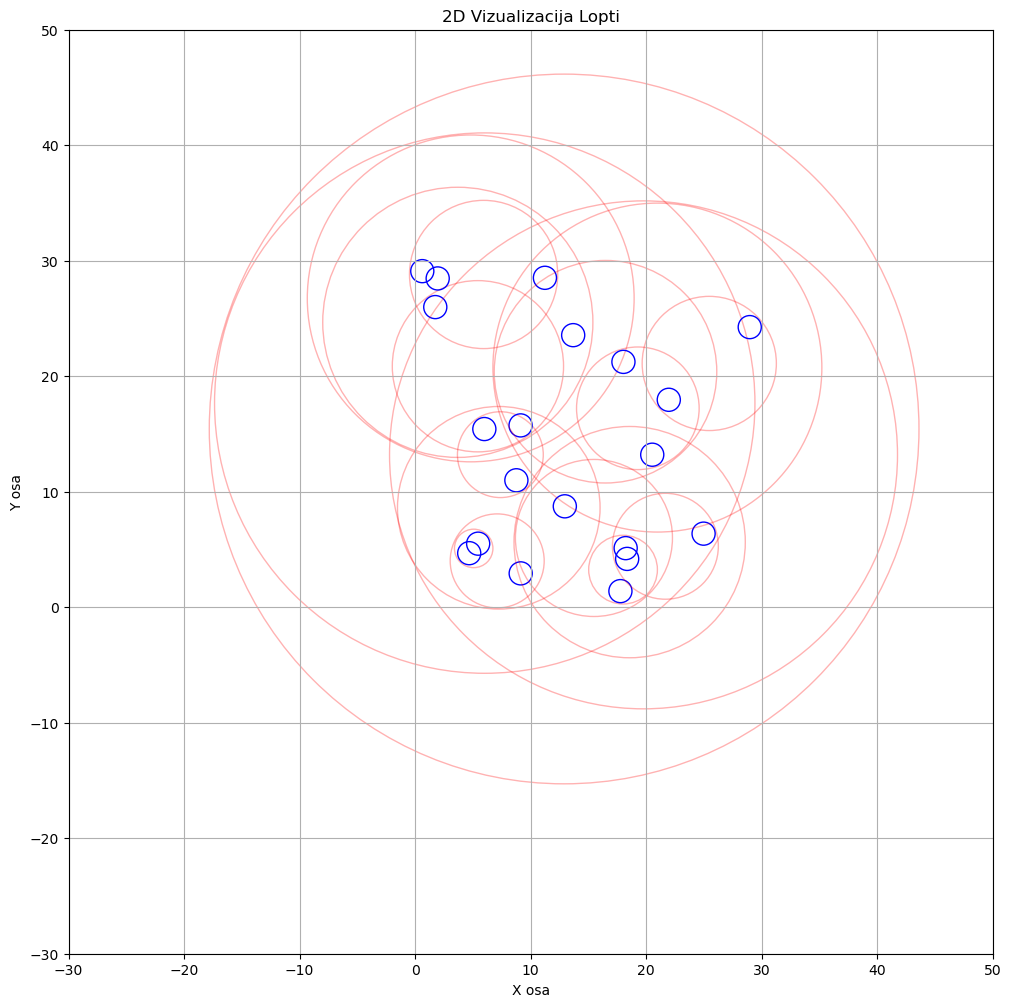

In [11]:
# Kreiranje grafika
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_aspect('equal', 'box')

# Dodavanje lopti iz BallTree strukture
plot_tree(tree.root, ax)

# Podesavanje osa
ax.set_xlim(-30, 50)
ax.set_ylim(-30, 50)

# Prikazivanje grafika
plt.grid(True)
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.title('2D Vizualizacija Lopti')
plt.savefig('results/kd_result2.png')

plt.show()

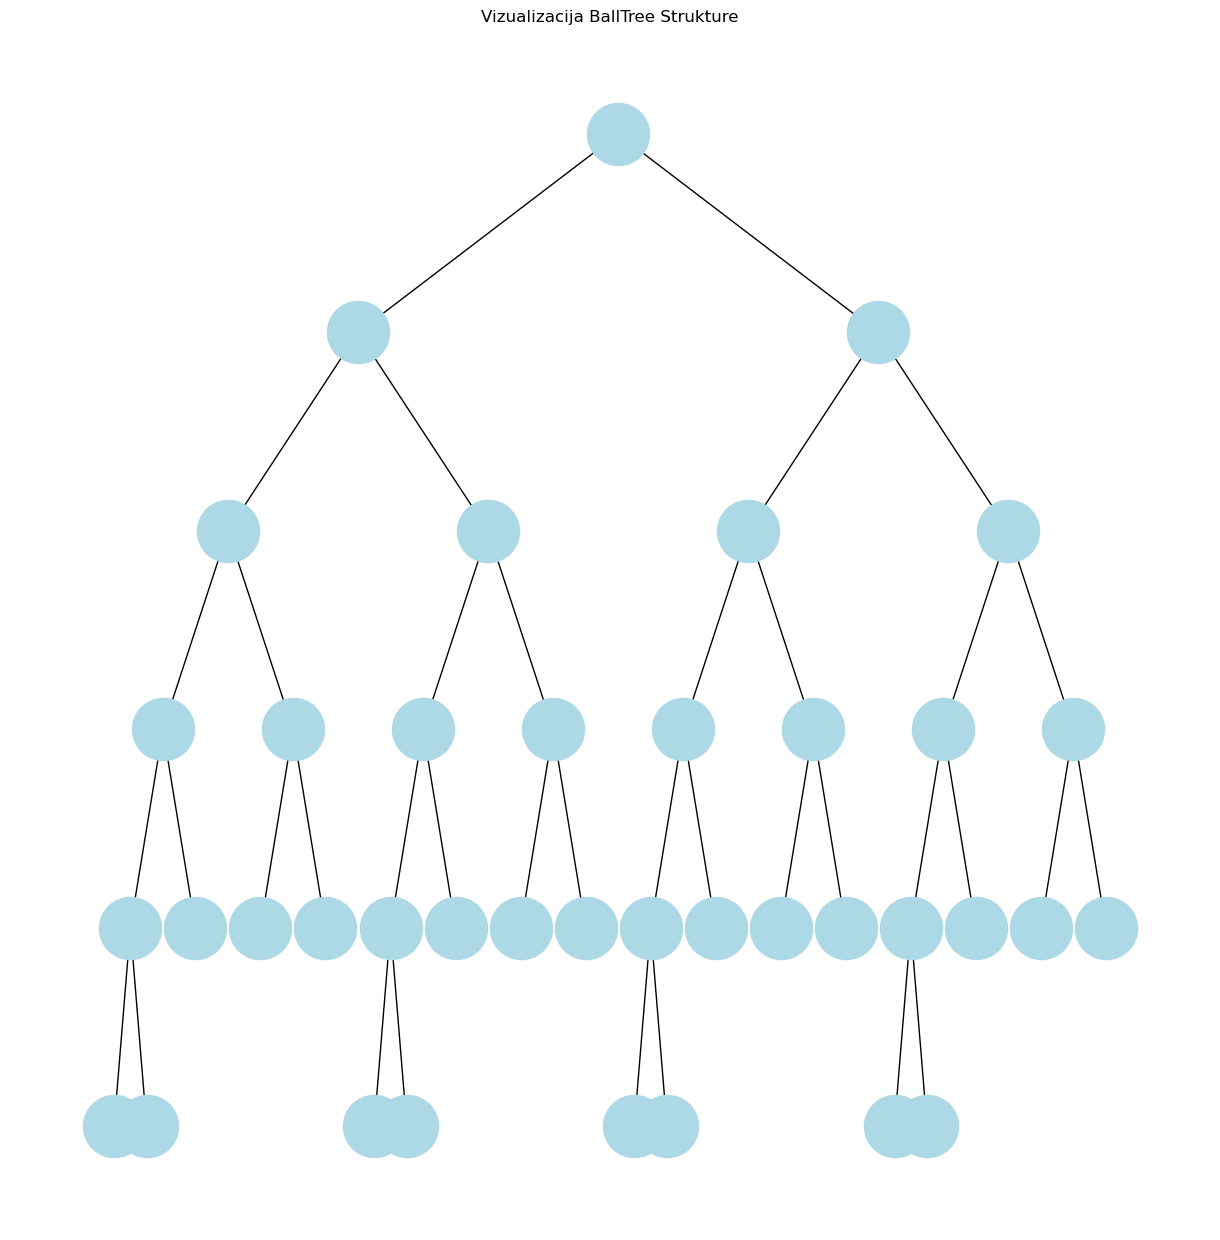

In [12]:
# Kreiranje grafa, pozicije i labele iz BallTree strukture
graph, pos, labels = plot_ball_tree(tree.root)

# Crtanje grafa
plt.figure(figsize=(12, 12))
nx.draw(graph, pos, node_size=2000, node_color='lightblue', font_size=8, font_weight='bold')
plt.title('Vizualizacija BallTree Strukture')
plt.savefig('results/kd_graph2.png')
plt.show()

In [13]:
# merenje vremena izvrsavanja

import time

np.random.seed(42)
balls3= []
vol_leaf = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140, 150, 160, 170, 190, 200]
result_time = []
for v in vol_leaf:
    for _ in range(v):
        x = np.random.random() * 100
        y = np.random.random() * 100
        r = 1
        ball = Ball([x, y], r)
        balls3.append(ball)
    start_time = time.time()
    tree = BallTree(balls3)
    end_time = time.time()
    result_time.append(end_time-start_time)

In [14]:
result_time

[0.00014257431030273438,
 0.0002913475036621094,
 0.0026166439056396484,
 0.0016553401947021484,
 0.0014238357543945312,
 0.0018990039825439453,
 0.008454084396362305,
 0.00757598876953125,
 0.00693964958190918,
 0.0071926116943359375,
 0.00697636604309082,
 0.007101535797119141,
 0.009598731994628906,
 0.010230064392089844,
 0.013861656188964844,
 0.014028310775756836,
 0.020441770553588867,
 0.016817092895507812,
 0.06925654411315918,
 0.021332740783691406,
 0.022766590118408203,
 0.025904178619384766,
 0.029314517974853516,
 0.054997920989990234,
 0.035653114318847656,
 0.0393986701965332,
 0.044403076171875,
 0.04785513877868652]

In [15]:
with open('kd_time.txt', 'w') as f:
    for x in result_time:
        f.write(f'{x}\n')